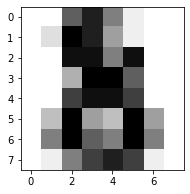

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
digits=datasets.load_digits()
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

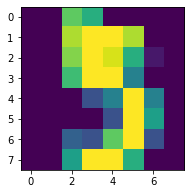

In [5]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[5])
plt.show()


In [9]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [12]:
digits.data.shape

(1797, 64)

In [13]:
digits.target.shape

(1797,)

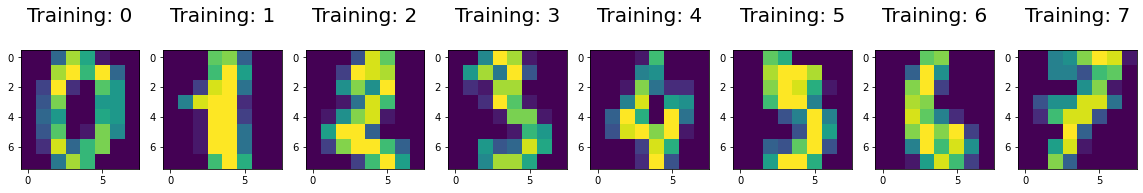

In [17]:
import numpy as np
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:8],digits.target[0:8])):
  plt.subplot(1,8,index+1)
  plt.imshow(np.reshape(image,(8,8)))
  plt.title('Training: %i\n' % label, fontsize = 20)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2,random_state=0)

In [25]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
pred=model.predict(X_test[-1].reshape(1,-1))

In [36]:
y_pred=model.predict(X_test)

In [34]:
model.score(X_test,y_test)

0.9666666666666667

Text(0.5, 15.0, 'Predicted label')

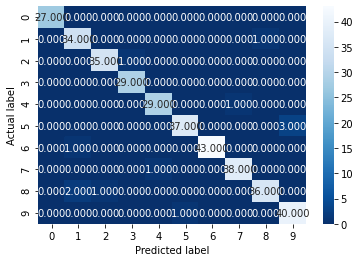

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt=".3f",cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')